In [3]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakkesharv/real-estate-data-from-7-indian-cities")

print("Path to dataset files:", path)
# List all files in the downloaded path
print(os.listdir(path))

100%|██████████| 1.59M/1.59M [00:00<00:00, 2.84MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rakkesharv/real-estate-data-from-7-indian-cities/versions/2
['Real Estate Data V21.csv']


In [5]:
# Pick the CSV file (example: "Real Estate Data V21.csv")
csv_file = os.path.join(path, "Real Estate Data V21.csv")

# Read the CSV
df = pd.read_csv(csv_file)
df.shape
df.head(10)

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes
5,KG Earth Homes,"2 BHK Flat for sale in Siruseri, Chennai",₹40.0 L,"Siruseri, Chennai",940,4250.0,"Price negotiable. Big hall, big balcony, gated...",3,No
6,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai","2 BHK Flat for sale in Sembakkam, Chennai",₹60.0 L,"THIRAN FLATS ,Gowrivakkam, Sembakkam,Chennai",880,6820.0,2 BHK Apartment for sale in Chennai. This prop...,3,Yes
7,TK Jasmine Grove,3 BHK Independent House for sale in Mahindra W...,₹72.35 L,"Mahindra World City, Chennai",1700,4250.0,A 3 BHK Independent House for sale in Mahindra...,3,Yes
8,Avenue,"2 BHK Flat for sale in West Tambaram, Chennai",₹42.0 L,"Brindavan Colony, West Tambaram,Chennai",840,5000.0,Check out this 2 BHK Apartment for sale in Tam...,3,No
9,Guru Kothai Aparts,"1 BHK Flat for sale in Chromepet, Chennai",₹30.0 L,"New Colony, Chromepet,Chennai",535,5610.0,We are the proud owners of this 1 bhk apartmen...,2,No


In [6]:
df.groupby('Property Title')['Property Title'].agg('count')

,Property Title
Property Title,
"1 BHK Flat for sale in Mahabalipuram, Chennai",1
"1 BHK Flat for sale in Aambethan, Pune",2
"1 BHK Flat for sale in Abbigere, Bangalore",1
"1 BHK Flat for sale in Adhanur, Chennai",2
"1 BHK Flat for sale in Adyar, Chennai",1
...,...
"Studio Flat for sale in Mulund East, Mumbai",1
"Studio Flat for sale in Talegaon Dabhade, Pune",1
"Studio Independent House for sale in Bommasandra, Bangalore",1


In [7]:
df=df.drop(['Description','Balcony'],axis='columns')
df

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Baths
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,3
...,...,...,...,...,...,...,...
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,3
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,2
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,1
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,2


In [8]:
# Example: removing outliers from 'sqft'
def remove_outliers_zscore(df, column, threshold=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_scores = (df[column] - mean) / std
    return df[np.abs(z_scores) <= threshold]

# Usage
df = remove_outliers_zscore(df, 'Price_per_SQFT', threshold=3)

In [9]:
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Usage
df1 = remove_outliers_iqr(df, 'Baths', factor=1.5)

In [10]:
df1.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Baths,0


In [11]:
len(df1.Location.unique())

6838

In [12]:
df1.Location=df1.Location.apply(lambda x: x.strip())
location_stats=df1.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

/tmp/ipython-input-1108284762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Location=df1.Location.apply(lambda x: x.strip())


,Location
Location,
"Wagholi, Pune",39
"Sector 12 Dwarka, New Delhi",38
"Bannerughatta, Bangalore",34
"Chakan, Pune",31
"Veer Sandra, Electronic City,Bangalore",31
...,...
"vaishnavi med,Himagiri Meadows, Kalena Agrahara,Bangalore",1
"urban pride,7th Phase, JP Nagar,Bangalore",1
"urban green phase,Jagatpur, Baguiati,Kolkata",1


In [13]:
len(location_stats[location_stats<=3])

5990

In [14]:
location_stats_less_than_3=location_stats[location_stats<=3]
location_stats_less_than_3

,Location
Location,
"Chintamani Nagar, Hadapsar,Pune",3
"Kadumuthsandra Plantation, Bangalore",3
"Khichripur, Mayur Vihar,New Delhi",3
"Samel Pada, Nalasopara West,Mumbai",3
"BSM Extension, Kengeri Satellite Town,Bangalore",3
...,...
"vaishnavi med,Himagiri Meadows, Kalena Agrahara,Bangalore",1
"urban pride,7th Phase, JP Nagar,Bangalore",1
"urban green phase,Jagatpur, Baguiati,Kolkata",1


In [15]:
df1.Location=df1.Location.apply(lambda x: 'other' if x in location_stats_less_than_3 else x)
len(df1.Location.unique())

/tmp/ipython-input-1981922187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Location=df1.Location.apply(lambda x: 'other' if x in location_stats_less_than_3 else x)


847

In [16]:
df1.shape

(13838, 7)

In [17]:
def extract_bhk(value):
    first_word = value.split(" ")[0]

    if first_word.lower() == "studio":
        return 0
    elif first_word.replace("+", "").isdigit():   # handles "2", "3+", etc.
        return float(first_word.replace("+", ""))
    else:
        return 0   # Non-residential types → 0

df1['BHK'] = df1['Property Title'].apply(extract_bhk)


/tmp/ipython-input-3362674969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BHK'] = df1['Property Title'].apply(extract_bhk)


In [18]:
df2=df1[~(df1.Total_Area/df1.BHK<325)]
df2.shape

(11843, 8)

In [19]:
df2.Price_per_SQFT.describe()

,Price_per_SQFT
count,11843.000000
mean,7833.743984
std,7304.762236
min,0.000000
25%,4405.000000
50%,5830.000000
75%,8460.000000
max,152000.000000


In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_SQFT)
        st = np.std(subdf.Price_per_SQFT)
        reduced_df = subdf[(subdf.Price_per_SQFT>(m-st)) & (subdf.Price_per_SQFT<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(9479, 8)

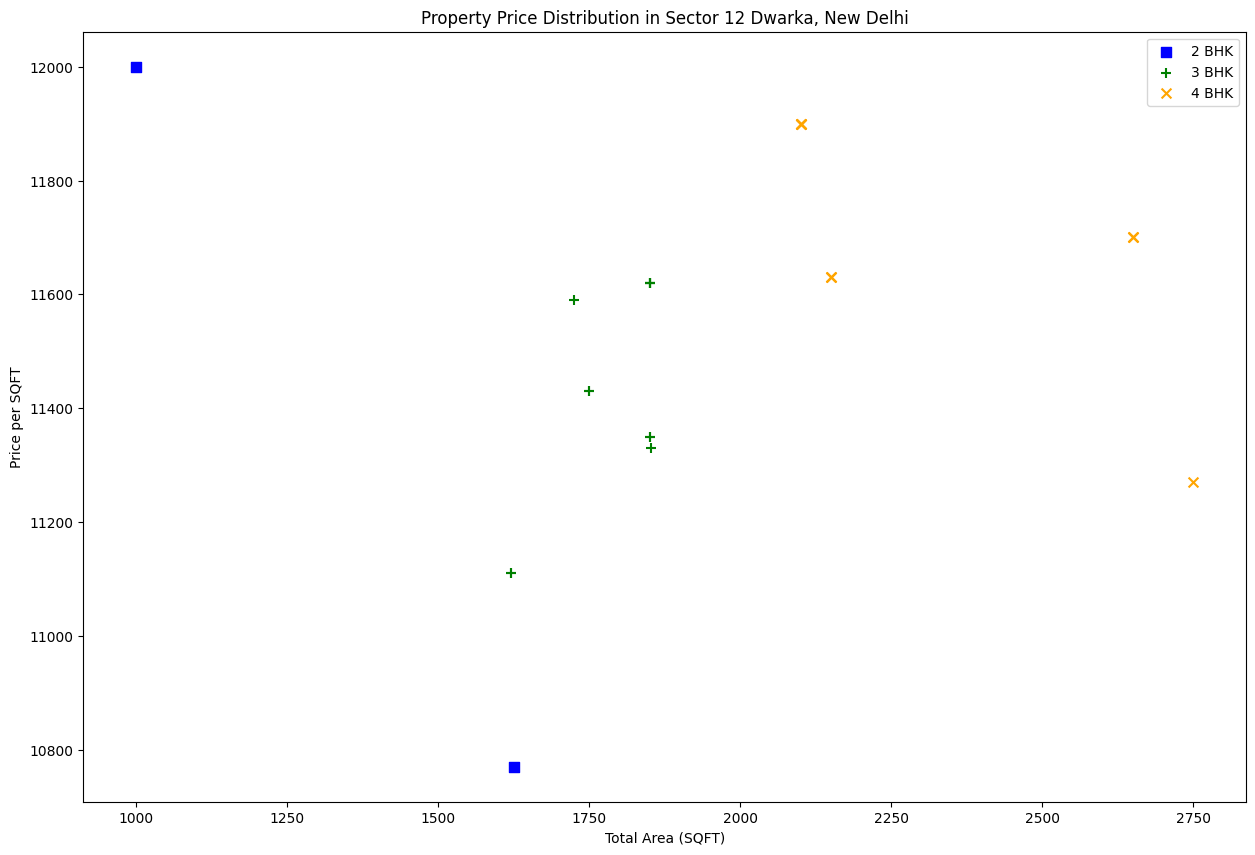

In [21]:
def plot_scatter_chart(df, location):
    # Define colors & markers for 10 BHK types
    styles = {
        1: {"color": "red",    "marker": "o"},
        2: {"color": "blue",   "marker": "s"},
        3: {"color": "green",  "marker": "+"},
        4: {"color": "orange", "marker": "x"},
        5: {"color": "purple", "marker": "D"},
        6: {"color": "brown",  "marker": "v"},
        7: {"color": "pink",   "marker": "^"},
        8: {"color": "gray",   "marker": "<"},
        9: {"color": "cyan",   "marker": ">"},
        10: {"color": "black", "marker": "P"},
    }

    matplotlib.rcParams['figure.figsize'] = (15,10)

    # Loop through BHK categories
    for bhk in range(1, 11):
        subset = df[(df.Location == location) & (df.BHK == bhk)]
        if not subset.empty:  # Plot only if data exists
            plt.scatter(
                subset.Total_Area,
                subset.Price_per_SQFT,
                color=styles[bhk]["color"],
                marker=styles[bhk]["marker"],
                s=50,
                label=f"{bhk} BHK"
            )

    plt.xlabel("Total Area (SQFT)")
    plt.ylabel("Price per SQFT")
    plt.title(f"Property Price Distribution in {location}")
    plt.legend()
    plt.show()

# Example usage:
plot_scatter_chart(df3, "Sector 12 Dwarka, New Delhi")

In [22]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_SQFT),
                'std': np.std(bhk_df.Price_per_SQFT),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>7:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_SQFT<(stats['mean'])].index.values)


    return df.drop(exclude_indices,axis='index')

df4 = remove_bhk_outliers(df3)
df4.shape

(5921, 8)

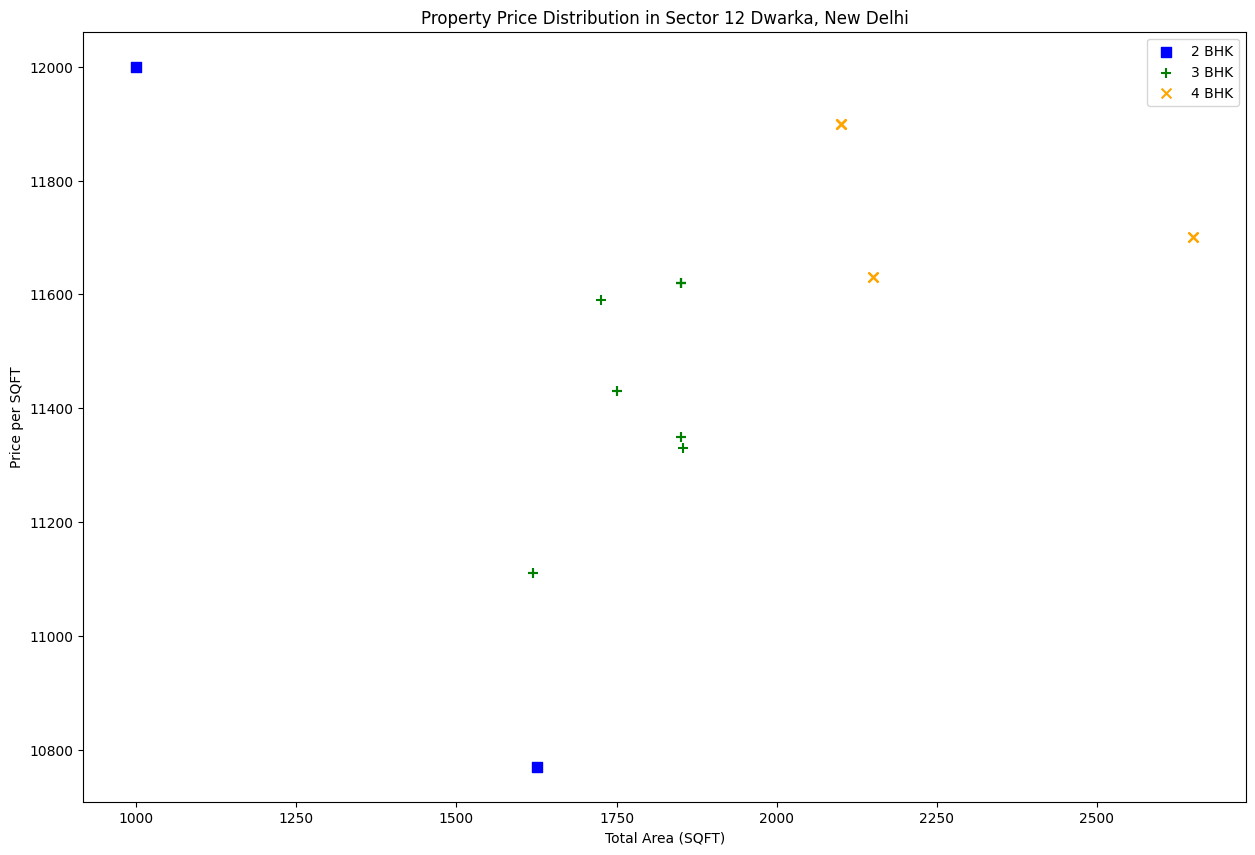

In [23]:
def plot_scatter_chart(df, location):
    # Define colors & markers for 10 BHK types
    styles = {
        1: {"color": "red",    "marker": "o"},
        2: {"color": "blue",   "marker": "s"},
        3: {"color": "green",  "marker": "+"},
        4: {"color": "orange", "marker": "x"},
        5: {"color": "purple", "marker": "D"},
        6: {"color": "brown",  "marker": "v"},
        7: {"color": "pink",   "marker": "^"},
        8: {"color": "gray",   "marker": "<"},
        9: {"color": "cyan",   "marker": ">"},
        10: {"color": "black", "marker": "P"},
    }

    matplotlib.rcParams['figure.figsize'] = (15,10)

    # Loop through BHK categories
    for bhk in range(1, 11):
        subset = df[(df.Location == location) & (df.BHK == bhk)]
        if not subset.empty:  # Plot only if data exists
            plt.scatter(
                subset.Total_Area,
                subset.Price_per_SQFT,
                color=styles[bhk]["color"],
                marker=styles[bhk]["marker"],
                s=50,
                label=f"{bhk} BHK"
            )

    plt.xlabel("Total Area (SQFT)")
    plt.ylabel("Price per SQFT")
    plt.title(f"Property Price Distribution in {location}")
    plt.legend()
    plt.show()

# Example usage:
plot_scatter_chart(df4, "Sector 12 Dwarka, New Delhi")

Text(0, 0.5, 'Count')

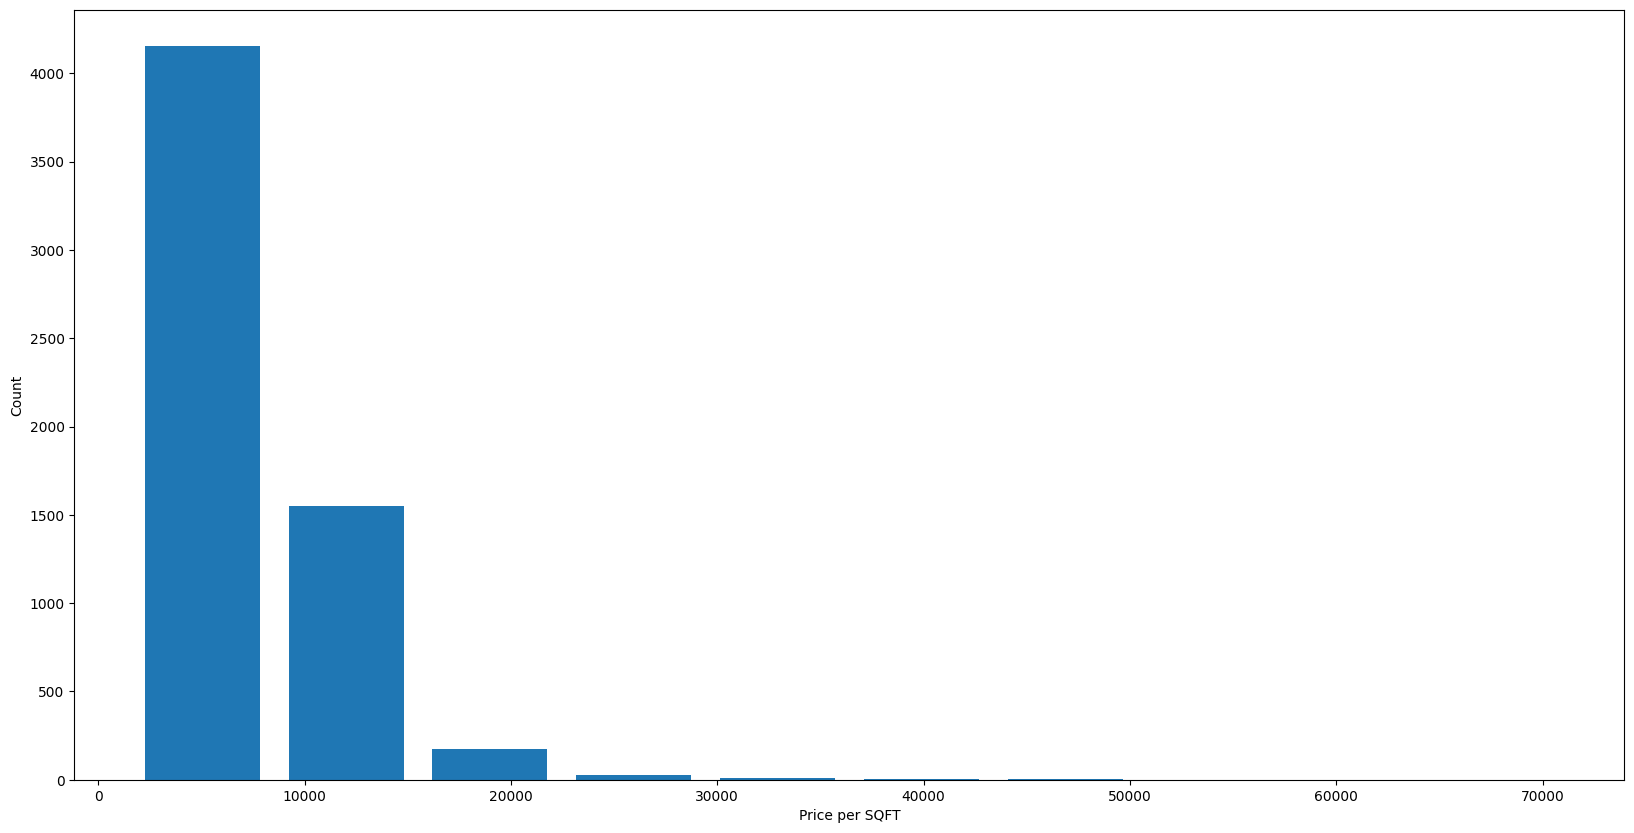

In [24]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df4.Price_per_SQFT,rwidth=0.8)
plt.xlabel("Price per SQFT")
plt.ylabel("Count")

In [25]:
df4[df4.Baths>df4.BHK+2]
df5=df4[df4.Baths<df4.BHK+2]
df5

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK
0,Ambiant The Infiniti,"2 BHK Flat for sale in Uttarahalli Hobli, Bang...",₹95.0 L,"2 Stage, Uttarahalli Hobli,Bangalore",1362,6970.0,3,2.0
1,Mantri Elite,"3 BHK Flat for sale in Uttarahalli Hobli, Bang...",₹98.0 L,"2 Stage, Uttarahalli Hobli,Bangalore",1280,7660.0,3,3.0
2,Shravanthi Paradise,"2 BHK Flat for sale in JP Nagar, Bangalore",₹49.0 L,"6th Phase, JP Nagar,Bangalore",1225,4000.0,3,2.0
3,SLV Pride,"2 BHK Flat for sale in JP Nagar, Bangalore",₹52.0 L,"6th Phase, JP Nagar,Bangalore",1045,4980.0,3,2.0
4,Shravanthi Paradise,"3 BHK Flat for sale in JP Nagar, Bangalore",₹65.0 L,"6th Phase, JP Nagar,Bangalore",1300,5000.0,3,3.0
...,...,...,...,...,...,...,...,...
9472,"Capital green ,Moti Nagar, New Delhi","1 BHK Flat for sale in Moti Nagar, New Delhi",₹40.0 L,other,375,10670.0,1,1.0
9473,"rohini sector 15 g2 block,Sector 15C, Sector 1...","1 BHK Flat for sale in Sector 15 Rohini, New D...",₹52.0 L,other,500,10400.0,2,1.0
9474,"Block an poorvi Shalimar bagh ,Shalimar Bagh, ...","7 BHK Flat for sale in Shalimar Bagh, New Delhi",₹1.75 Cr,other,2500,7000.0,4,7.0
9475,"Sharda Puri, Ramesh Nagar,New Delhi","1 BHK Flat for sale in Ramesh Nagar, New Delhi",₹40.0 L,other,446,8970.0,2,1.0


## Apply the cleaning function

### Subtask:
Apply the cleaning function to the 'Price' column in the DataFrame.


In [26]:
def convert_price_to_numeric(price_str):
    if pd.isna(price_str):
        return np.nan

    price_str = str(price_str).strip().lower().replace("₹", "").replace(",", "")

    # Ignore invalid values
    if "request" in price_str or price_str in ["nan", "", "none"]:
        return np.nan

    try:
        if "cr" in price_str:
            return float(price_str.replace("cr", "").strip()) * 1e7
        elif "lac" in price_str or "lakh" in price_str or "l" in price_str:
            return float(price_str.replace("lac", "").replace("lakh", "").replace("l", "").strip()) * 1e5
        elif "acs" in price_str:   # if written as 'acs'
            return float(price_str.replace("acs", "").strip()) * 1e5
        else:
            return float(price_str.strip())
    except:
        return np.nan

In [27]:
df5.loc[:, 'Price'] = df5['Price'].apply(convert_price_to_numeric)
print(df5['Price'].head(20))

0      9500000.0
1      9800000.0
2      4900000.0
3      5200000.0
4      6500000.0
5     19100000.0
6     17500000.0
7     17000000.0
8     17000000.0
9      7800000.0
10    24500000.0
11    28000000.0
12    17200000.0
13     8500000.0
14     6500000.0
15     3900000.0
16    11500000.0
17    25600000.0
18     7200000.0
19     9800000.0
Name: Price, dtype: object


In [28]:
df5['Price'].unique()

array([9500000.0, 9800000.0, 4900000.0, 5200000.0, 6500000.0, 19100000.0,
       17500000.0, 17000000.0, 7800000.0, 24500000.0, 28000000.0,
       17200000.0, 8500000.0, 3900000.0, 11500000.0, 25600000.0,
       7200000.0, 12500000.0, 20000000.0, 4700000.0, 4300000.0, 7100000.0,
       4260000.0, 7000000.0, 6700000.0, 3800000.0, 3500000.0, 4400000.0,
       10000000.0, 11399999.999999998, 13600000.000000002,
       11200000.000000002, 7500000.0, 3050000.0, 11000000.0, 7719000.0,
       5500000.0, 6600000.0, 5600000.0, 12000000.0, 2700000.0, 4000000.0,
       3100000.0, 3300000.0, 15000000.0, 5000000.0, 4800000.0, 2400000.0,
       3000000.0, 3400000.0, 2500000.0, 2300000.0, 21500000.0, 13500000.0,
       6800000.0, 8300000.0, 16000000.0, 6200000.0, 25000000.0, 2950000.0,
       3250000.0, 2550000.0, 4375000.0, 5100000.0, 1100000.0, 6000000.0,
       6900000.0, 2100000.0, 29000000.0, 6300000.0, 3600000.0, 4500000.0,
       4600000.0, 9000000.0, 3550000.0, 17800000.0, 8750000.0, 8600000.

In [29]:
df5.dropna(subset=['Price'], inplace=True)
display(df5.isnull().sum())

/tmp/ipython-input-2154431315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.dropna(subset=['Price'], inplace=True)


,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Baths,0
BHK,0


In [30]:
dummies = pd.get_dummies(df5.Location)
display(dummies.head())

,"2 Stage, Uttarahalli Hobli,Bangalore","6th Phase, JP Nagar,Bangalore","7th Phase, JP Nagar,Bangalore","8th Phase, JP Nagar,Bangalore","9th Phase, JP Nagar,Bangalore","AECS C Block, Begur,Bangalore","AECS Layout, Singasandra,Bangalore","AMCO Colony, Koti Hosahalli,Bangalore","Aarey Colony, Goregaon East,Mumbai","Abhee Prakruthi Villa ,Teachers Colony, Chandapura,Bangalore",...,"West Shalimar Bagh, Shalimar Bagh,New Delhi","Yashvant Viva TownShip, Nalasopara East,Mumbai","Yashwant Nagar, Talegaon Dabhade,Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yerawada, Pune","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore","Yeswanth Nagar, Madambakkam,Chennai","Yewalewadi, Pune",other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
display(df6.head())

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,"2 Stage, Uttarahalli Hobli,Bangalore","6th Phase, JP Nagar,Bangalore",...,"West Sagarpur, New Delhi","West Shalimar Bagh, Shalimar Bagh,New Delhi","Yashvant Viva TownShip, Nalasopara East,Mumbai","Yashwant Nagar, Talegaon Dabhade,Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yerawada, Pune","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore","Yeswanth Nagar, Madambakkam,Chennai","Yewalewadi, Pune"
0,Ambiant The Infiniti,"2 BHK Flat for sale in Uttarahalli Hobli, Bang...",9500000.0,"2 Stage, Uttarahalli Hobli,Bangalore",1362,6970.0,3,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Mantri Elite,"3 BHK Flat for sale in Uttarahalli Hobli, Bang...",9800000.0,"2 Stage, Uttarahalli Hobli,Bangalore",1280,7660.0,3,3.0,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Shravanthi Paradise,"2 BHK Flat for sale in JP Nagar, Bangalore",4900000.0,"6th Phase, JP Nagar,Bangalore",1225,4000.0,3,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,SLV Pride,"2 BHK Flat for sale in JP Nagar, Bangalore",5200000.0,"6th Phase, JP Nagar,Bangalore",1045,4980.0,3,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Shravanthi Paradise,"3 BHK Flat for sale in JP Nagar, Bangalore",6500000.0,"6th Phase, JP Nagar,Bangalore",1300,5000.0,3,3.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df6 = df6.drop(['Location','Name','Price_per_SQFT'],axis='columns')
display(df6.head())

,Property Title,Price,Total_Area,Baths,BHK,"2 Stage, Uttarahalli Hobli,Bangalore","6th Phase, JP Nagar,Bangalore","7th Phase, JP Nagar,Bangalore","8th Phase, JP Nagar,Bangalore","9th Phase, JP Nagar,Bangalore",...,"West Sagarpur, New Delhi","West Shalimar Bagh, Shalimar Bagh,New Delhi","Yashvant Viva TownShip, Nalasopara East,Mumbai","Yashwant Nagar, Talegaon Dabhade,Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yerawada, Pune","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore","Yeswanth Nagar, Madambakkam,Chennai","Yewalewadi, Pune"
0,"2 BHK Flat for sale in Uttarahalli Hobli, Bang...",9500000.0,1362,3,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"3 BHK Flat for sale in Uttarahalli Hobli, Bang...",9800000.0,1280,3,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"2 BHK Flat for sale in JP Nagar, Bangalore",4900000.0,1225,3,2.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"2 BHK Flat for sale in JP Nagar, Bangalore",5200000.0,1045,3,2.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"3 BHK Flat for sale in JP Nagar, Bangalore",6500000.0,1300,3,3.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
x = df6.drop(['Price', 'Property Title'],axis='columns')
y = df6.Price
display(x.head())
display(y.head())

,Total_Area,Baths,BHK,"2 Stage, Uttarahalli Hobli,Bangalore","6th Phase, JP Nagar,Bangalore","7th Phase, JP Nagar,Bangalore","8th Phase, JP Nagar,Bangalore","9th Phase, JP Nagar,Bangalore","AECS C Block, Begur,Bangalore","AECS Layout, Singasandra,Bangalore",...,"West Sagarpur, New Delhi","West Shalimar Bagh, Shalimar Bagh,New Delhi","Yashvant Viva TownShip, Nalasopara East,Mumbai","Yashwant Nagar, Talegaon Dabhade,Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yerawada, Pune","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore","Yeswanth Nagar, Madambakkam,Chennai","Yewalewadi, Pune"
0,1362,3,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1280,3,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1225,3,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1045,3,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1300,3,3.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Price
0,9500000.0
1,9800000.0
2,4900000.0
3,5200000.0
4,6500000.0


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [35]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.6837938380997908

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([-0.41653011,  0.51848523,  0.62103689,  0.00213852,  0.55097778])

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
      gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
      gs.fit(x,y)
      scores.append({
          'model':algo_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.255222,{}
1,lasso,0.255253,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.424315,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [38]:
x.columns

Index(['Total_Area', 'Baths', 'BHK', '2 Stage, Uttarahalli Hobli,Bangalore',
       '6th Phase, JP Nagar,Bangalore', '7th Phase, JP Nagar,Bangalore',
       '8th Phase, JP Nagar,Bangalore', '9th Phase, JP Nagar,Bangalore',
       'AECS C Block, Begur,Bangalore', 'AECS Layout, Singasandra,Bangalore',
       ...
       'West Sagarpur, New Delhi',
       'West Shalimar Bagh, Shalimar Bagh,New Delhi',
       'Yashvant Viva TownShip, Nalasopara East,Mumbai',
       'Yashwant Nagar, Talegaon Dabhade,Pune', 'Yelahanka, Bangalore',
       'Yemalur, Bangalore', 'Yerawada, Pune',
       'Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore',
       'Yeswanth Nagar, Madambakkam,Chennai', 'Yewalewadi, Pune'],
      dtype='object', length=817)

In [39]:
np.where(x.columns=='Sector 12 Dwarka, New Delhi')[0][0]

np.int64(624)

In [40]:
def predict_price(location, sqft, bhk, baths, model, columns):

    # Zero array with all features
    x_array = np.zeros(len(columns))

    # Set numeric values
    x_array[0] = sqft
    x_array[1] = bhk
    x_array[2] = baths

    # One-hot encode location
    if location in columns:
        loc_index = np.where(columns == location)[0][0]
        x_array[loc_index] = 1

    # Convert to DataFrame to preserve feature names
    x_df = pd.DataFrame([x_array], columns=columns)

     # Predict raw price in Rupees
    price = model.predict(x_df)[0]

    # Convert to Lakhs / Crores
    if price >= 1e7:   # 1 Crore = 1 Cr = 1e7
        return f"{price/1e7:.2f} Cr"
    elif price >= 1e5: # 1 Lakh = 1e5
        return f"{price/1e5:.2f} Lakhs"
    else:
        return f"{price:.2f} Rs"

In [41]:
pred = predict_price("Sector 12 Dwarka, New Delhi", 500, 3, 2, lr_clf, x.columns)
print("Predicted Price:", pred)

Predicted Price: 79.27 Lakhs


In [42]:
import pickle
try:
    with open(r'C:\Users\jeetb\myspenv\House Price Predictor\Real Estate Data V21.pickle', 'wb') as f:
        pickle.dump(lr_clf, f)
    print("Pickle file created successfully!")
except Exception as e:
    print("Error:", e)

Pickle file created successfully!


In [43]:
import json
columns={
    'data_columns': [col for col in x.columns]
}
with open (r"C:\Users\jeetb\myspenv\House Price Predictor\Columnsnew.json","w") as f:
    f.write(json.dumps(columns))